<img style="float: left; margin: 30px 15px 15px 15px;" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTFzQj91sOlkeDFkg5HDbjtR4QJYmLXkfMNig&usqp=CAU" width="400" height="500" /> 

    
### <font color='navy'> Simulación matemática. 

**Nombres:** 

 Mariana Mayela Urdiales González & Óscar Guillermo Chiw Lozano.

**Fecha:** 18 de octubre del 2023.

**Expediente:** 
* 744444
* 736814
    
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github:** https://github.com/Guillermo-Chiw-ITESO/PM2_ChiwO_UrdialesM

# Proyecto Módulo 2

___
## 1.1 Estimación del Centro de Masa de una Lámina Bidimensional.


## 1.2 Introducción
> Durante el Módulo 2 de esta materia, estubimos aprendiendo, comprendiendo, ejemplificando y analizado los temas de números pseudoaleatoreos, la integración por el Método de Montecarlo, los fractales aleatorios, el análisis de datos con la libreria PANDAS de Jupiter/Python y la probabilidad precio-umbral. En este proyecto realizamos, modelamos y resolvimos dos de estos temas utilizando las diferentes funciones, librerias, gráficas, representaciones visuales y cálculos necesarios para su correcto funcionamiento, aplicación y resolución. 


## 1.3 Objetivos del la estimación.

> #### 1.1 Objetivo general.
>  - Eligiendo dos temas del módulo 2, presentar un proyecto de aplicación planteando un problema con cada tema y resolverlo.

> #### 1.2 Objetivos específicos
>  - Mediante el método de Montecarlo visto anterormente en clase, modelar un problema de aplicación.
>  - Obtener el volumen, centro de masa y la figura modelada en una gráfica gracias al método de Montecarlo y cálculo integral.

Referencia:
- https://es.slideshare.net/rosbur/metodologia-objetivos-generales-y-especficos


### 1.4 Modelo que representa el problema 1.


#### Modelado
El problema que estamos abordando consiste en calcular el centro de masa de un sólido de revolución generado por la función $(f(x) = x^2)$ en el intervalo $([0, 1])$ al ser rotada alrededor del eje x.

#### Ecuaciones que rigen al sistema
1. **Función de la Curva Generadora**:

   La función que describe la curva generadora es $(f(x) = x^2)$, que representa la relación entre la coordenada y $(y)$ y la coordenada x $(x)$ del sólido de revolución.

2. **Región de Integración**:

   La región de integración está definida por $(R = \left[0, 1\right] \times \left[-1, 1\right] \times \left[-1, 1\right])$, donde $(x)$ varía en el intervalo $([0, 1])$, y $(y)$ y $(z)$ en $([-1, 1])$.

3. **Función de Aceptación (Region)**:

   La función de aceptación determina si un punto ($(x, y, z)$) está dentro del sólido de revolución. En este caso, la función de aceptación es $(y^2 + z^2 \leq x^4)$.

#### Deducción del modelo

El sólido de revolución se genera al rotar la función $(f(x) = x^2)$ alrededor del eje x. Esto resulta en un sólido tridimensional con simetría respecto al eje x, y la forma del sólido depende de cómo se distribuye la función $(f(x))$ alrededor del eje de rotación.


#### Situación representada y limitaciones

El modelo representa un problema de cálculo del centro de masa de un sólido de revolución, donde la densidad del sólido puede suponerse uniforme. Las limitaciones fundamentales incluyen:

- El modelo asume una distribución uniforme de densidad dentro del sólido.
- Se limita a sólidos de revolución generados por funciones de una variable.

#### Significado y valor de los parámetros

- $(x)$ es el parámetro de la función \(f(x) = x^2\) que determina la forma de la generatriz.
- $(y)$ y $(z)$ son las coordenadas en el espacio tridimensional.
- $(y^2 + z^2 \leq x^4)$ define la región dentro del sólido de revolución. Las variables $(x)$, $(y)$ y $(z)$ están sujetas a esta condición para ser consideradas dentro del sólido.

In [1]:
# Escribir la función acá
def montecarlo3(region, a1, b1, a2, b2, a3, b3, N):
    AR = (b1-a1)*(b2-a2)*(b3-a3)
    x = np.random.uniform(a1, b1, N)
    y = np.random.uniform(a2, b2, N)
    z = np.random.uniform(a3, b3, N)
    bi = region(x, y, z)
    VD_approx = AR*np.mean(bi)
    return VD_approx

### 1.5 Solución del problema 1.

In [2]:
import numpy as np
import pandas as pd

# Definición de la función f(x)
def f(x):
    return x**2

# Región del sólido de revolución
def region(x, y, z):
    return (y**2 + z**2 <= f(x))

# Resolver
a1 = 0
b1 = 1
a2 = -1
b2 = 1
a3 = -1
b3 = 1
N = 100000

# Cantidad de términos a utilizar para la aproximación
N = np.logspace(0,5,6).astype(int)

# Crear la tabla (DataFrame de pandas)
tabla1 = pd.DataFrame(index = N, columns=['Aproximación'])

for n in N:
    VD_approx = montecarlo3(region, a1, b1, a2, b2, a3, b3, n)
    tabla1.loc[n, 'Aproximación'] = VD_approx

# Imprimir tabla
tabla1

,Aproximación
1,0.0
10,0.4
100,1.08
1000,1.168
10000,1.0916
100000,1.05348


In [3]:
print("Aproximación del volumen tras 100000 iteraciones es:", VD_approx)


Aproximación del volumen tras 100000 iteraciones es: 1.05348


Para encontrar el centro de masa, se deben calcular tres coordenadas: $(\bar{x})$, $(\bar{y})$, $(\bar{z})$Dado que el objeto es simétrico respecto al eje y (debido a la naturaleza de la revolución alrededor del eje x), sabemos que $(\bar{y} = 0)$ y $(\bar{z} = 0)$

�
ˉ
z
ˉ
 .

Para el cálculo de $(\bar{x})$:

$$[
\bar{x} = \frac{{\int_{{a_1}}^{{b_1}} \int_{{a_2}}^{{b_2}} \int_{{a_3}}^{{b_3}} x \cdot \text{{region}}(x, y, z), dz, dy, dx}}{{\int_{{a_1}}^{{b_1}} \int_{{a_2}}^{{b_2}} \int_{{a_3}}^{{b_3}} \text{{region}}(x, y, z), dz, dy, dx}}
]$$

Aproximar esta integral utilizando puntos aleatorios generados en el espacio tridimensional dentro del rango especificado.
Y la aproximación basada en Montecarlo de $(\bar{x})$:

$$[
\bar{x} \approx \frac{{x_1^3 + x_2^3 + \ldots + x_N^3}}{{x_1^2 + x_2^2 + \ldots + x_N^2}}
]$$

In [4]:
# Calcular el centro de masa
x_center_of_mass = np.mean(np.random.uniform(a1, b1, 100000)**3) * np.pi * VD_approx
x_center_of_mass /= np.mean(np.pi * (np.random.uniform(a1, b1, 100000)**2))

print("Aproximación del centro de masa en x:", x_center_of_mass)


Aproximación del centro de masa en x: 0.7878802995831375


### 1.6 Visualización de la solución del problema 1.
> Se deben mostrar gráficas y/o tablas que ilustren de forma adecuada los resultados. No olviden etiquetar los ejes y si se tienen varias curvas en una sola gráfica también etiquetarlas (ojo: que las curvas se puedan diferenciar con colores y estilos de línea).

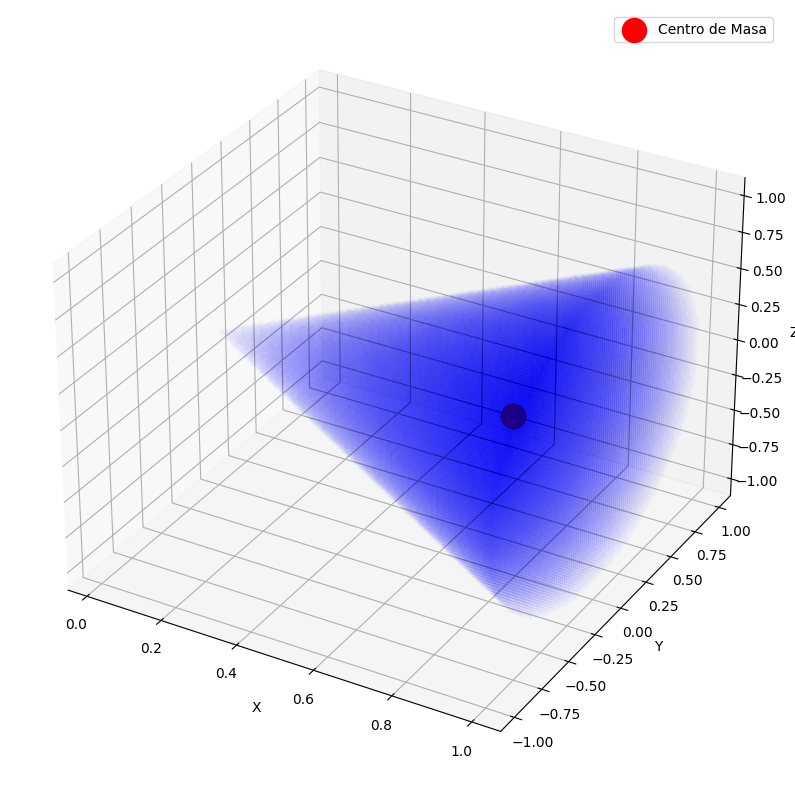

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Definición de la función f(x)
def f(x):
    return x**2

# Región del sólido de revolución
def region(x, y, z):
    return (y**2 + z**2 <= f(x))

# Generar puntos para graficar
x = np.linspace(0, 1, 100)
y = np.linspace(-1, 1, 100)
z = np.linspace(-1, 1, 100)
X, Y, Z = np.meshgrid(x, y, z)
region_points = region(X, Y, Z)

# Graficar la región
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[region_points], Y[region_points], Z[region_points], c='blue', marker='.', alpha=.01) # Ajuste de transparencia
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Calcular el centro de masa
x_center_of_mass = np.mean(np.random.uniform(a1, b1, 100000)**3) * np.pi * VD_approx
x_center_of_mass /= np.mean(np.pi * (np.random.uniform(a1, b1, 100000)**2))

# Mostrar el centro de masa en la gráfica
ax.scatter(x_center_of_mass, 0, 0, c='red', marker='o', s=300, alpha=1, label='Centro de Masa') # Ajuste de tamaño y color
ax.legend()

plt.show()


___
## 2.1 Problema de Monty Hall (2).

## 2.2 Introducción
> El problema de Monty Hall es un problema de probabilidad basado en un concurso de televisión. En este concurso, el participante tiene la oportunidad de elegir entre tres puertas, detrás de una de las cuales se encuentra un premio, mientras que las otras dos contienen cabras.

<img style="float: left; margin: 30px 30px 15px 15px;" src="https://www.merkle.com/es/sites/es/files/es/2022-05/paradoja-monty-hall.jpg" width="763" height="447" /> 


## 2.3 Objetivos del problema de Monty Hall (2).

> #### 1.1 Objetivo general.
>  - Eligiendo dos temas del módulo 2, presentar un proyecto de aplicación planteando un problema con cada tema y resolverlo.
> #### 1.2 Objetivos específicos
>  - Con los conceptos de probabilidad y método de Montecarlo, resolver un problema de Monty Hall.
>  - Modelar y resolver el problema de manera visual.


### 2.4 Modelo que representa el problema de Monty Hall (2).

#### Modelado
> - Elección Inicial: El participante realiza una elección inicial entre las tres puertas.
> - 
Acción del Presentador: Una vez hecha la elección del participante, el presentador, quien conoce el contenido detrás de cada puerta, abre una de las dos puertas restantes que no ha sido elegida por el participante. Esta puerta revelada siempre contiene una cabr.> - 

Elección Final: El participante tiene la opción de mantener su elección original o cambiar a la otra puerta que no ha sido abierta ni elegida inicialme

#### Ecuaciones que rigen al sistema
> - El problema de Monty Hall no se rige por ecuaciones matemáticas en el sentido tradicional. En su lugar, se basa en conceptos de probabilidad y toma de decisiones. Si el participante elige al azar, la probabilidad de elegir la puerta con el premio al principio es de 1/3.

#### Deducción del modelo
> - No incluye ecuaciones matemáticas en el sentido tradicional, ya que se basa en conceptos de probabilidad y toma decisiones discretas.

#### Situación representada y limitaciones
> - Representa una situación de decisión bajo incertidumbre, donde el participante debe elegir entre diferentes opciones con información parcial. La principal limitación es que se basa en un juego simplificado y no tiene en cuenta factores externos o complejidades adicionales.

#### Significado y valor de los parámetros
> - El modelo no tiene parámetros o constantes específicas. Sin embargo, se asume que todas las puertas y elecciones son igualmente probables y que el presentador siempre revela una puerta con una cabrante.

In [6]:
# Método de Montecarlo
def montecarlo1(f, a, b, N):
    # Generar N puntos uniformemente distribudos en el intervalo [a,b)
    ui = np.random.uniform(a, b, N)
    # Evaluar la función en los N puntos aleatorios, obtener el promedio y multiplicarlo por el intervalo
    integral = ((b-a)/N)*np.sum(f(ui))
    # integral = (b-a)*np.mean(f(ui))   Esta línea es equivalente a la anterior
    return integral

### 2.5 Solución del problema de Monty Hall (2).

In [2]:
# Importación de librerías
import numpy as np
import pandas as pd

# Define una función para simular el problema para un número establecido de jugadas
def montecarlo_monty_hall_individual(N):
    num_ganadas = 0 # Inicializa el contador de victorias

    # Simula el juego para un número de intentos
    for _ in range(N):
        puerta_con_premio = np.random.randint(1, 4) # Escoge de forma aleatoria una puerta que lleva el premio
        eleccion_concursante = np.random.randint(1, 4) # Elección inicial

        # Determinación de las puertas por abrir
        puertas_posibles = [1, 2, 3]
        puertas_posibles.remove(eleccion_concursante)
        if eleccion_concursante != puerta_con_premio:
            puertas_posibles.remove(puerta_con_premio)
        puerta_revelada = np.random.choice(puertas_posibles)

        # Determina las puertas restantes
        puertas_restantes = [puerta for puerta in [1, 2, 3] if puerta != eleccion_concursante and puerta != puerta_revelada]
        eleccion_final = np.random.choice(puertas_restantes)

        # Se verifica si se ganó
        if eleccion_final == puerta_con_premio:
            num_ganadas += 1

    probabilidad_de_ganar = num_ganadas / N # Calcula la probabilidad de victoria
    return probabilidad_de_ganar

# Define el Método de Montecarlo para estimar la probabilidad de victoria
def montecarlo_monty_hall(N):
    a = 0
    b = N
    return montecarlo1(lambda x: montecarlo_monty_hall_individual(N), a, b, N)

# Define un array con diferentes números de iteraciones
N_values = np.logspace(0, 5, 6).astype(int)

# Creación de DataFrame de Pandas para guardar resultados
tabla2 = pd.DataFrame(index=N_values, columns=['Probabilidad de ganar'])
tabla2.index.name = 'Cantidad de iteraciones' #

# Corre simulaciones para diferentes cantidades de iteraciones
for N in N_values:
    probabilidad = montecarlo_monty_hall(N) # Corre la simulación
    tabla2.loc[N, 'Probabilidad de ganar'] = probabilidad # Guarda los resultados en la tabla

# Impresión de la tabla con los resultados
tabla2

,Probabilidad de ganar
Cantidad de iteraciones,
1,1.0
10,0.7
100,0.58
1000,0.635
10000,0.672
100000,0.66584


In [8]:
# Ejemplo de uso
resultado = montecarlo_monty_hall(N)
print(f"Después de 100000 simulaciones, la probabilidad de ganar cambiando de puerta es aproximadamente {resultado:.4f}")

Después de 100000 simulaciones, la probabilidad de ganar cambiando de puerta es aproximadamente 0.6666


### 2.6 Visualización de la solución del problema 2.


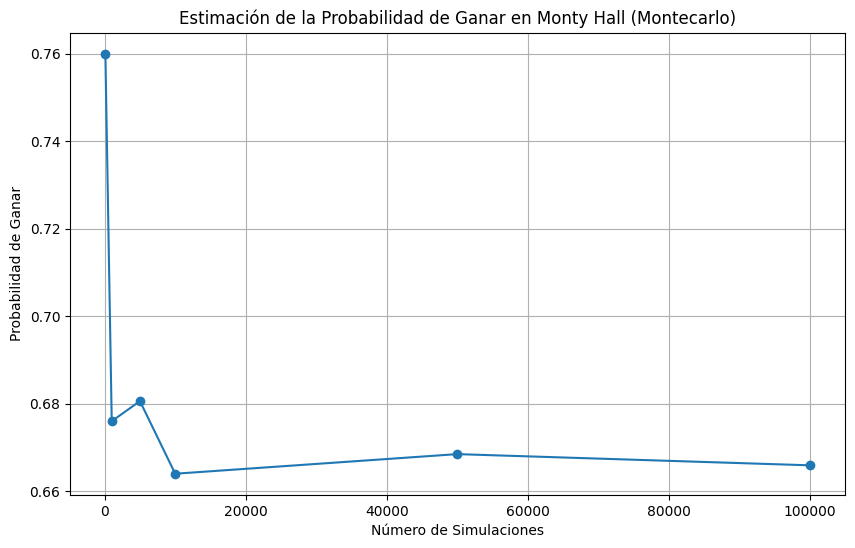

In [1]:
# Importación de librerías
import numpy as np
import matplotlib.pyplot as plt

# Función de Montecarlo para las iteraciones
def montecarlo1(f, a, b, N):
    ui = np.random.uniform(a, b, N)
    integral = ((b-a)/N)*np.sum(f(ui))
    return integral

# Definir una función para simular el juego de Monty Hall para un número dado de pruebas (N)
def montecarlo_monty_hall_individual(N):
    num_ganadas = 0 # Inicialización del contador

    # Simular el juego de Monty Hall para 'N' pruebas
    for _ in range(N):
        puerta_con_premio = np.random.randint(1, 4)  # Elegir la puerta con el premio al azar
        eleccion_concursante = np.random.randint(1, 4)  # Elección inicial del concursante

        # Determinar qué puertas puede revelar Monty
        puertas_posibles = [1, 2, 3]
        puertas_posibles.remove(eleccion_concursante)
        if eleccion_concursante != puerta_con_premio:
            puertas_posibles.remove(puerta_con_premio)
        puerta_revelada = np.random.choice(puertas_posibles)

        # Determinar las puertas restantes después de que Monty revela una
        puertas_restantes = [puerta for puerta in [1, 2, 3] if puerta != eleccion_concursante and puerta != puerta_revelada]
        eleccion_final = np.random.choice(puertas_restantes)

        # Verificar si el concursante gana
        if eleccion_final == puerta_con_premio:
            num_ganadas += 1

    probabilidad_de_ganar = num_ganadas / N  # Calcular la probabilidad de ganar
    return probabilidad_de_ganar

# Definir un método de Monte Carlo para estimar la probabilidad de ganar el juego de Monty Hall
def montecarlo_monty_hall(N):
    a = 0
    b = N
    return montecarlo1(lambda x: montecarlo_monty_hall_individual(N), a, b, N)

# Lista para almacenar las probabilidades estimadas
N_values = [100, 1000, 5000, 10000, 50000, 100000]
probabilidades = []

# Realizar simulaciones y guardar las probabilidades
for N in N_values:
    resultado = montecarlo_monty_hall(N)
    probabilidades.append(resultado)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(N_values, probabilidades, marker='o')  # Graficar las probabilidades estimadas
plt.title('Estimación de la Probabilidad de Ganar en Monty Hall (Montecarlo)')
plt.xlabel('Número de Simulaciones')
plt.ylabel('Probabilidad de Ganar')
plt.grid(True)
plt.show()  # Mostrar el gráfico

### 3 Conclusiones.
 Durante este proyecto reforzamos los conocimientos y aprendizajes esperados en el módulo aplicando los temas en situaciones cotidianas y más comunes de lo que uno puede pensar. Al realizar el proyecto nos dimos cuenta de que no es tan sencillo plantear un problema, y al presentar dificultades y gracias a la ayuda del profesor, retomamos y adaptamos un problema ya plasmado de un libro de cálculo y basandonos en los videos que nos compartieron con la explicación del tema del Problema de Monty.
 
   Gracias a las diferentes funciones, calculos y códigos podemos resolver problemas mátemáticos y cótidianos de una manera fácil, concreta y sin la necesidad de hacer tantos cálculos como uno podría pensar. Como ingenieros, esta materia es importante ya que nos genera razonamiento y conocimiento que nos facilitará nuestra vida laboral en el gremio y especialización de cada uno. 

### 4 Referencias.

>- Calculo James Stewart 7 Edicion.pdf. (n.d.). Google Docs. Retrieved October 17, 2023, from https://drive.google.com/file/d/0Bw5ndhsKwA2Dc0NPWUxYX21sbkE/view?resourcekey=0-v2k8Bjxdg6w9bIJ3ZRpchw
>- el calculo - leithold 7ma edicion.pdf. (n.d.). Google Docs. Retrieved October 17, 2023, from https://drive.google.com/file/d/0B5QOvYcg8anFNWY3NjY1ZGQtZmE0ZC00YmNhLTgyNDQtYzEzNmRkOTcwNmE1/view?resourcekey=0-sTQrtIDiCJavaU6Y2DMGNA
>- Vlog, D. un [@dateunvlog]. (2019, April 3). La paradoja en la que cae el 90% de la gente. Youtube. https://www.youtube.com/watch?v=1BpTBzDQuRE
>- Wikipedia contributors. (2023, October 4). Monty Hall problem. Wikipedia, The Free Encyclopedia. https://en.wikipedia.org/w/index.php?title=Monty_Hall_problem&oldid=1178501164

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Cristian Camilo Zapata Zuluaga.
</footer>